In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
x_max = 5
y_max = 5
z_max = 5
dx = 0.1

X = torch.arange(-x_max, x_max, dx)
Y = torch.arange(-y_max, y_max, dx)
Z = torch.arange(-z_max, z_max, dx)

X, Y, Z = torch.meshgrid(X, Y, Z, indexing='ij')

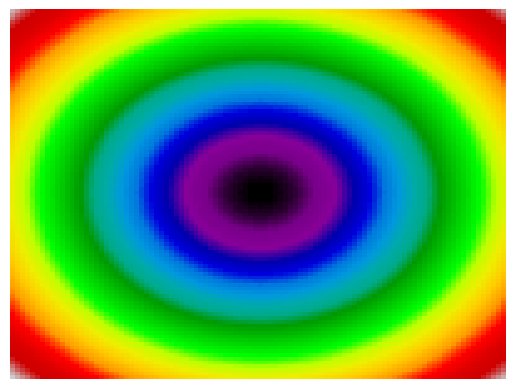

In [6]:
r_0 = 1
def potential(x, y, z):
    r = torch.sqrt(x**2.0 + y**2.0 + z**2.0)
    return  -r_0 / r

V = torch.nan_to_num(potential(X, Y, Z), posinf=1e9, neginf=-1e9)

plt.pcolormesh(X[:,:,0], Y[:,:,0], V[:,:,0], cmap='nipy_spectral')
plt.axis('off')
plt.show()

In [7]:
V_hat = torch.zeros((X.shape[0], X.shape[1], X.shape[2], X.shape[0], X.shape[1], X.shape[2]))
dd_x = torch.zeros((X.shape[0], X.shape[1], X.shape[2], X.shape[0], X.shape[1], X.shape[2]))
dd_y = torch.zeros((X.shape[0], X.shape[1], X.shape[2], X.shape[0], X.shape[1], X.shape[2]))
dd_z = torch.zeros((X.shape[0], X.shape[1], X.shape[2], X.shape[0], X.shape[1], X.shape[2]))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            V_hat[i,j,k,i,j,k] = V[i,j,k]

            # Forward difference
            if i == 0:
                dd_x[i,j,k,i+2,j,k] = 1.0/dx**2.0
                dd_x[i,j,k,i+1,j,k] = -2.0/dx**2.0
                dd_x[i,j,k,i,j,k] = 1.0/dx**2.0
            # Backward difference
            elif i == X.shape[0] - 1:
                dd_x[i,j,k,i-2,j,k] = 1.0/dx**2.0
                dd_x[i,j,k,i-1,j,k] = -2.0/dx**2.0
                dd_x[i,j,k,i,j,k] = 1.0/dx**2.0
            # Central difference
            else:
                dd_x[i,j,k,i-1,j,k] = 1.0/dx**2.0
                dd_x[i,j,k,i,j,k] = -2.0/dx**2.0
                dd_x[i,j,k,i+1,j,k] = 1.0/dx**2.0

            # Forward difference
            if j == 0:
                dd_y[i,j,k,i,j+2,k] = 1.0/dx**2.0
                dd_y[i,j,k,i,j+1,k] = -2.0/dx**2.0
                dd_y[i,j,k,i,j,k] = 1.0/dx**2.0
            # Backward difference
            elif j == X.shape[1] - 1:
                dd_y[i,j,k,i,j-2,k] = 1.0/dx**2.0
                dd_y[i,j,k,i,j-1,k] = -2.0/dx**2.0
                dd_y[i,j,k,i,j,k] = 1.0/dx**2.0
            # Central difference
            else:
                dd_y[i,j,k,i,j-1,k] = 1.0/dx**2.0
                dd_y[i,j,k,i,j,k] = -2.0/dx**2.0
                dd_y[i,j,k,i,j+1,k] = 1.0/dx**2.0

            # Forward difference
            if k == 0:
                dd_z[i,j,k,i,j,k+2] = 1.0/dx**2.0
                dd_z[i,j,k,i,j,k+1] = -2.0/dx**2.0
                dd_z[i,j,k,i,j,k] = 1.0/dx**2.0
            # Backward difference
            elif k == X.shape[2] - 1:
                dd_z[i,j,k,i,j,k-2] = 1.0/dx**2.0
                dd_z[i,j,k,i,j,k-1] = -2.0/dx**2.0
                dd_z[i,j,k,i,j,k] = 1.0/dx**2.0
            # Central difference
            else:
                dd_z[i,j,k,i,j,k-1] = 1.0/dx**2.0
                dd_z[i,j,k,i,j,k] = -2.0/dx**2.0
                dd_z[i,j,k,i,j,k+1] = 1.0/dx**2.0


: 

In [149]:
E_hat = -inv_r_d_r - dd_r + V_hat
E_hat = E_hat.type(torch.complex64)
E_hat.requires_grad = True

eigenvalues, eigenvectors = torch.linalg.eig(E_hat)
eigenvalues = eigenvalues.real

tensor([0.0017], grad_fn=<DivBackward0>)


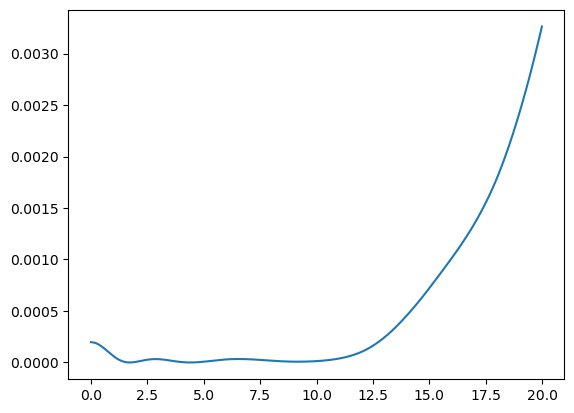

In [159]:
best_idx = (torch.abs(eigenvalues).min() == torch.abs(eigenvalues))

def get_e(n):
    return torch.abs(eigenvectors.detach().T[best_idx][0])**2.0

plt.plot(R, get_e(best_idx))

E = eigenvalues.real[best_idx] * h**2.0 / (2.0 * m)
print(E)

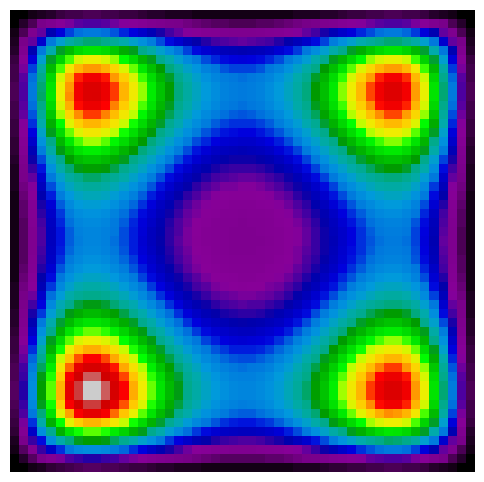

In [55]:
#plt.figure(figsize=(6,6))
#plt.pcolormesh(I, J, get_e(0), cmap='nipy_spectral')
#plt.axis('off')
#plt.show()